# Analysis of velocity based on events
Noteboook for methodology of correlating the calculated angular velocity of a rat to velocity of event extracted from event log.

In [2]:
import numpy as np
import pandas as pd
import h5py
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats, integrate, signal

%matplotlib inline
sns.set(color_codes=True)

path = '../datasets/analysis/'

fname = [
    'VRAcuityExp_2017-07-13_14-39-17_VR-4A_NIC',
    'VRAcuityExp_2017-07-13_15-05-16_VR-2B_NIC',
    'VRAcuityExp_2017-07-13_15-19-09_VR-2A_EDU',
    'VRAcuityExp_2017-07-13_15-38-34_VR-1A_NIC',
    'VRAcuityExp_2017-07-13_15-53-40_VR-1B_NIC',
    'VRAcuityExp_2017-07-13_16-11-46_VR-3A_NIC',
    'VRAcuityExp_2017-07-13_16-27-08_VR-3A_NIC',
    'VRAcuityExp_2017-07-13_17-09-07_VR-5A_NIC', ]

event = {}
dfV = {}
dfU = {}
dfFil = {}

for i, x in enumerate(fname):
    event[i] = pd.read_hdf(path+x+'_event.h5'   , 'Event')      
    dfV[i]   = pd.read_hdf(path+x+'_velocity.h5', 'Full' )      
    dfU[i]   = dfV[i].drop({'X_Ori', 'Y_Ori', 'Z_Ori', 'dTime', 'lx1', 'lz1', 'lx2', 'lz2'}, axis=1)
    

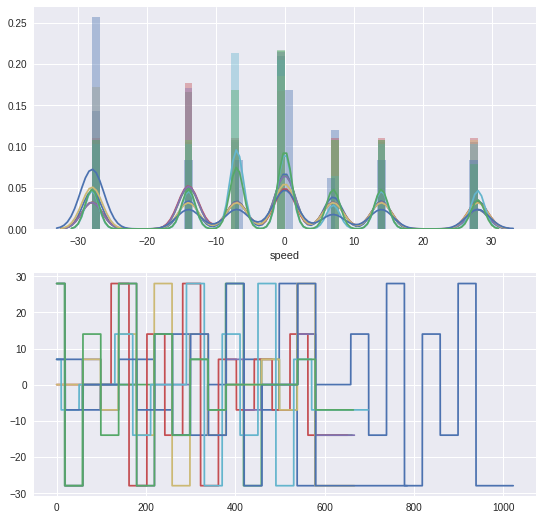

In [3]:
# grid velocity plots for all experiments
fig = plt.figure(figsize=(9,9))

ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

for i in range(0, len(fname)):
    sns.distplot(event[i].speed, ax=ax1)
    ax2.plot    (event[i].Time , event[i].speed)

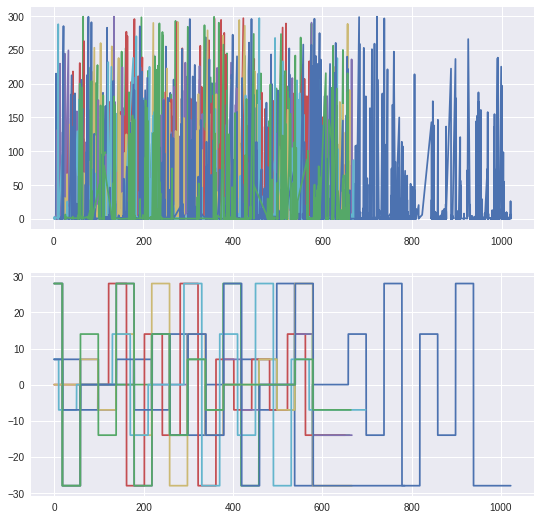

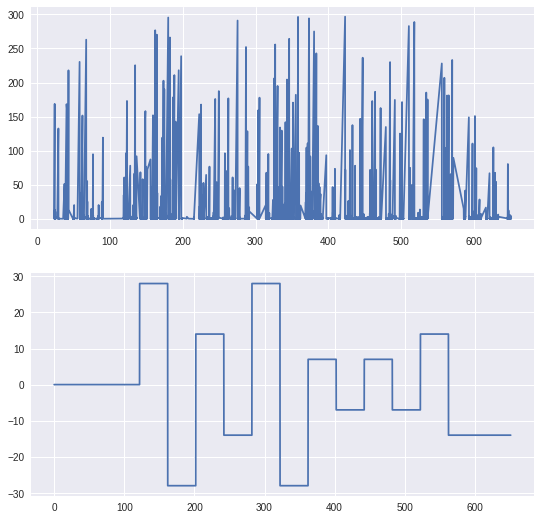

In [4]:
# print of the data to be compared  
fig = plt.figure(figsize=(9,9))

ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
    
for i, x in enumerate(fname):
    ax1.plot(dfV[i].Time  , dfV[i].U)
    ax2.plot(event[i].Time, event[i].speed)
    
fig = plt.figure(figsize=(9,9))

ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
    
ax1.plot(dfV[2].Time  , dfV[2].U)
ax2.plot(event[2].Time, event[2].speed)

## Cross - correlation of the signals

In [5]:
# single experiment analysis
i = 0

df = pd.merge(event[i], dfU[i], on='Frame')
df.drop({'Time_y','Vxyz', 'theta'}, axis=1, inplace=True)

df.corr  = signal.correlate(df.speed, df.U, mode='same') / 128
df.corrZ = signal.correlate(df.speed, df.UZero, mode='same') / 128


/home/ateska/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


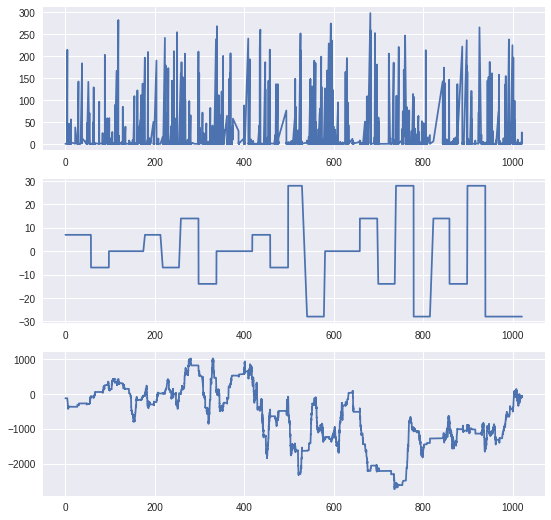

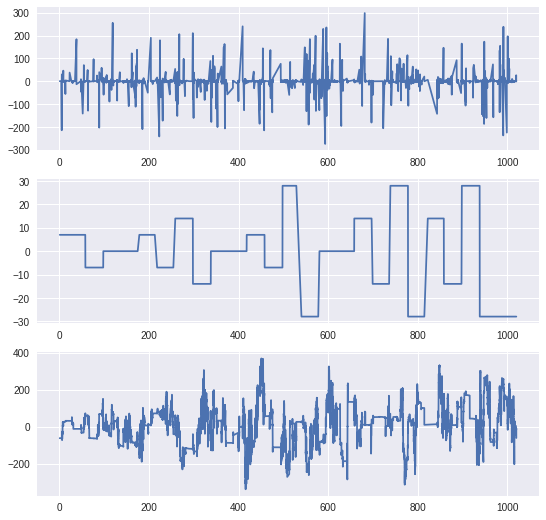

In [6]:
x# plot fof single event
fig = plt.figure(figsize=(9,9))

ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
    
ax1.plot(df.Time_x, df.U)
ax2.plot(df.Time_x, df.speed)
ax3.plot(df.Time_x, df.corr)

x# plot fof single event
fig = plt.figure(figsize=(9,9))

ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
    
ax1.plot(df.Time_x, df.UZero)
ax2.plot(df.Time_x, df.speed)
ax3.plot(df.Time_x, df.corrZ)


In [7]:
# all experiments analysis
df = {}
for i, x in enumerate(fname):
    df[i] = pd.merge(event[i], dfU[i], on='Frame')
    df[i].drop({'Time_y','Vxyz', 'theta'}, axis=1, inplace=True)
    df[i].corr = signal.correlate(df[i].speed, df[i].U, mode='same') / 128
    df[i].corrZ = signal.correlate(df[i].speed, df[i].UZero, mode='same') / 128


/home/ateska/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  import sys


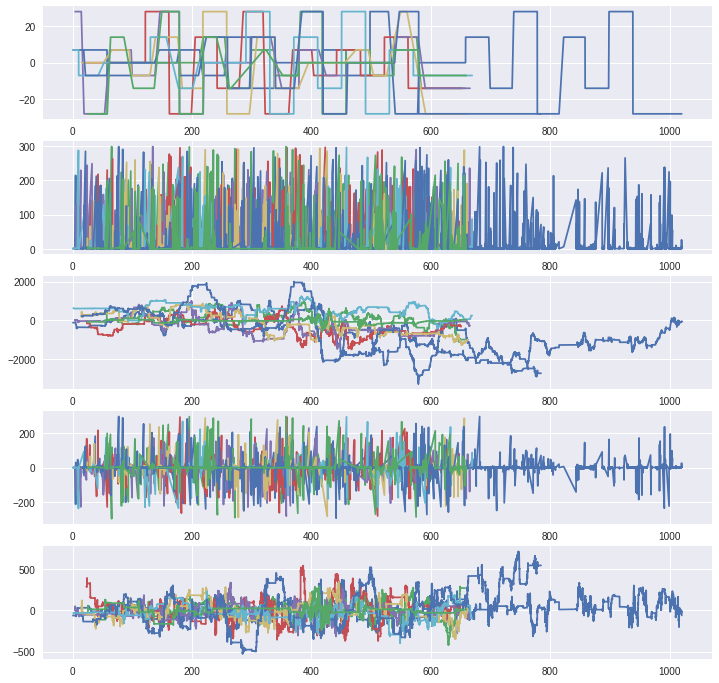

In [8]:
fig = plt.figure(figsize=(12,12))

ax1 = fig.add_subplot(511)
ax2 = fig.add_subplot(512)
ax3 = fig.add_subplot(513)
ax4 = fig.add_subplot(514)
ax5 = fig.add_subplot(515)

for i, x in enumerate(fname):
    ax1.plot(df[i].Time_x, df[i].speed)
    ax2.plot(df[i].Time_x, df[i].U)
    ax3.plot(df[i].Time_x, df[i].corr)
    ax4.plot(df[i].Time_x, df[i].UZero)
    ax5.plot(df[i].Time_x, df[i].corrZ)


In [9]:
#for i, x in enumerate(fname):
#    fig = plt.figure(figsize=(9,9))

#    ax1 = fig.add_subplot(311)
#    ax2 = fig.add_subplot(312)
#    ax3 = fig.add_subplot(313)

#    ax1.plot(df[i].Time_x, df[i].U)
#    ax2.plot(df[i].Time_x, df[i].speed)
#    ax3.plot(df[i].Time_x, df[i].corr)


{0:           Frame         Time     X_Ori     Y_Ori     Z_Ori     dTime  \
2         162.0     0.675000 -0.871430  0.356575 -0.336845  0.004167   
3         165.0     0.687500 -0.872983  0.348583 -0.341161  0.004167   
4         998.0     4.158334 -0.928275 -0.007238  0.371824  0.675000   
5        1206.0     5.025000 -0.268692 -0.116252  0.956185  0.004166   
6        1207.0     5.029167 -0.268385 -0.117617  0.956104  0.004167   
7        1208.0     5.033334 -0.268240 -0.119042  0.955969  0.004167   
8        1209.0     5.037500 -0.267994 -0.120410  0.955866  0.004166   
9        1210.0     5.041667 -0.268374 -0.120896  0.955698  0.004167   
10       1211.0     5.045834 -0.268565 -0.122312  0.955464  0.004167   
11       1212.0     5.050000 -0.268570 -0.121237  0.955600  0.004166   
12       1213.0     5.054167 -0.269134 -0.121783  0.955372  0.004167   
13       1214.0     5.058334 -0.269166 -0.122138  0.955318  0.004167   
14       1215.0     5.062500 -0.269535 -0.120433  0.955430  

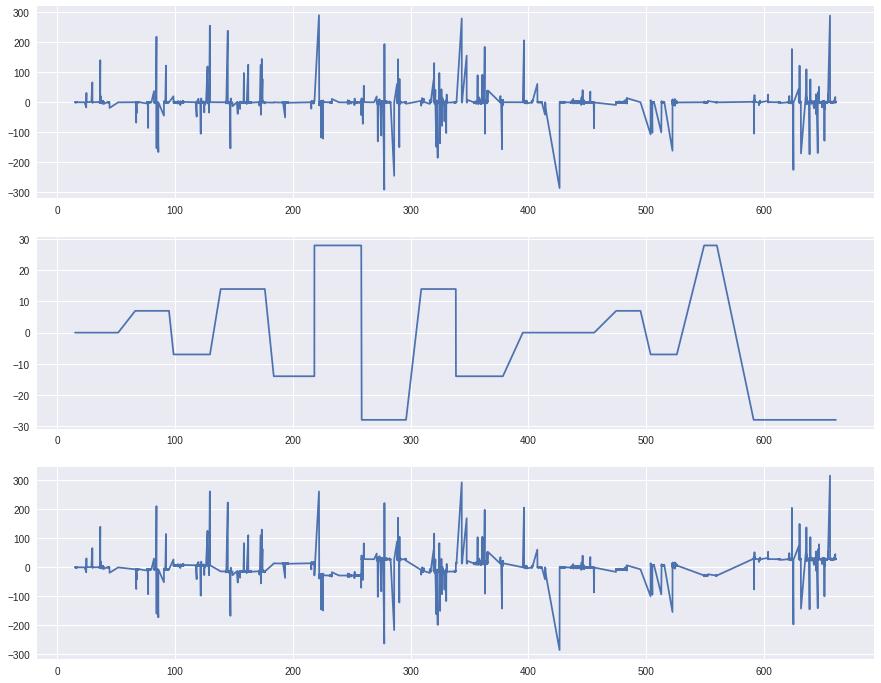

In [27]:
i = 4

# averging the signal
WINDOW_SIZE = 200
window = []; rms = []

for ii in range(0, len(df[i])):
  
    if len(window) > WINDOW_SIZE:
        del window[0]

    window.append(df[i].iloc[ii].UZero)
    w = np.array(window)
    rms.append(np.sqrt(np.mean(w**2)))
    
df[i].corr2 = signal.correlate(df[i].speed, rms, mode='same') / 128
df[i]['rms'] = rms

df[i]['sub1'] = df[i].apply(lambda row: row.UZero - row.speed , axis=1)


## Plotting

fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
ax1.plot(df[i].Time_x, df[i].UZero)
ax2.plot(df[i].Time_x, df[i].speed)
ax3.plot(df[i].Time_x, df[i].sub1)


print(dfV)


In [ ]:

'''
fig = plt.figure(figsize=(9,9))
ax1 = fig.add_subplot(511)
ax2 = fig.add_subplot(512)
ax3 = fig.add_subplot(513)
ax4 = fig.add_subplot(514)
ax5 = fig.add_subplot(515)

ax1.plot(df[i].Time_x, df[i].UZero)
ax2.plot(df[i].Time_x, rms)
ax3.plot(df[i].Time_x, df[i].speed)
ax4.plot(df[i].Time_x, df[i].corrZ)
#ax4.plot(df[i].Time_x, df[i].corr2)
ax5.plot(df[i].Time_x, df[i].corr2)
'''

In [1]:
## TODO: clean up for clear comparinson of two velocities and different window sizes

# averging the signal
WINDOW_SIZE = 200

for i, x in enumerate(fname):
    window = []; rms = []

    for ii in range(0, len(df[i])):
  
        if len(window) > WINDOW_SIZE:
            del window[0]

        window.append(df[i].iloc[ii].UZero)
        w = np.array(window)
        rms.append(np.sqrt(np.mean(w**2)))

    df[i]['rms'] = rms
    df[i].corr2 = signal.correlate(df[i].speed, rms, mode='same') / 128


NameError: name 'fname' is not defined

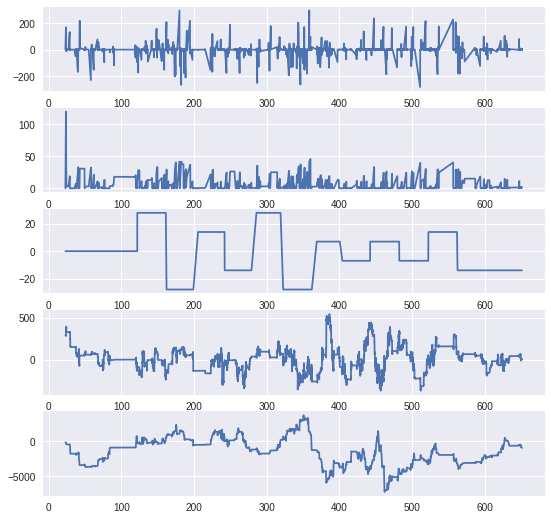

In [16]:
## Plotting
i = 2
fig = plt.figure(figsize=(9,9))

ax1 = fig.add_subplot(511)
ax2 = fig.add_subplot(512)
ax3 = fig.add_subplot(513)
ax4 = fig.add_subplot(514)
ax5 = fig.add_subplot(515)

ax1.plot(df[i].Time_x, df[i].UZero)
ax2.plot(df[i].Time_x, df[i].rms)
ax3.plot(df[i].Time_x, df[i].speed)
ax4.plot(df[i].Time_x, df[i].corrZ)
ax5.plot(df[i].Time_x, df[i].corr2)

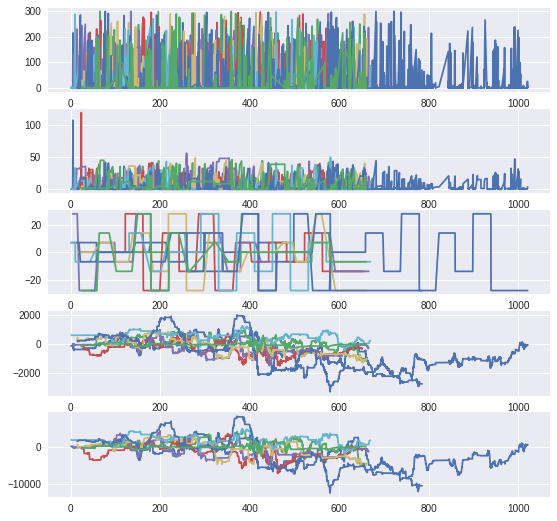

In [17]:
## Plotting
fig = plt.figure(figsize=(9,9))

ax1 = fig.add_subplot(511)
ax2 = fig.add_subplot(512)
ax3 = fig.add_subplot(513)
ax4 = fig.add_subplot(514)
ax5 = fig.add_subplot(515)

for i, x in enumerate(fname):
    ax1.plot(df[i].Time_x, df[i].U)
    ax2.plot(df[i].Time_x, df[i].rms)
    ax3.plot(df[i].Time_x, df[i].speed)
    ax4.plot(df[i].Time_x, df[i].corr)
    ax5.plot(df[i].Time_x, df[i].corr2)

In [13]:
x = df[i].speed
y = df[i].rms

p = stats.pearsonr(x, y)
print(p)

(-0.001637372018011183, 0.77600169357577353)
